# Use linear transforms between successive frames to straighten video

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
from scipy.stats import multivariate_normal
from scipy.io import loadmat 

from otimage import readers, imagerep
from otimage.utils import plot_maxproj

In [3]:
# Frame index in raw file
t = 5

# Load two successive frames from dataset
#img_path = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'
#with readers.ZimmerReader(img_path) as reader:
img_path = '/home/mn2822/Desktop/WormTraces/data/Vivek/1010_tail_03/data.mat'
with readers.VivekReader(img_path) as reader:
    
    # TODO: Fix this
    #frame_0 = reader.get_frame(0)
    frame_1 = reader.get_frame(1)
    
    frame_t = reader.get_frame(t)
    img_shape = frame_1.shape

# Load MP components
#mp_path = '/home/mn2822/Desktop/WormOT/data/zimmer/mp_components/mp_0000_0050.mat'
mp_path = '/home/mn2822/Desktop/WormOT/data/vivek/1010_tail_03/mp_components/mp_0000_0900.mat'
mp_data = loadmat(mp_path)
cov = mp_data['cov']
pts_0 = mp_data['means'][0, :, :]
pts_t = mp_data['means'][t, :, :]
wts_0 = mp_data['weights'][0, :, 0]
wts_t = mp_data['weights'][t, :, 0]

# Load transformations
#reg_path = '/home/mn2822/Desktop/WormOT/data/zimmer/registration/reg1_0000_0050.mat'
reg_path = '/home/mn2822/Desktop/WormOT/data/vivek/1010_tail_03/registration/reg2_0000_0900.mat'
reg_data = loadmat(reg_path)
alpha = reg_data['f_alpha'][t, :]
beta = reg_data['f_beta'][t, :, :]

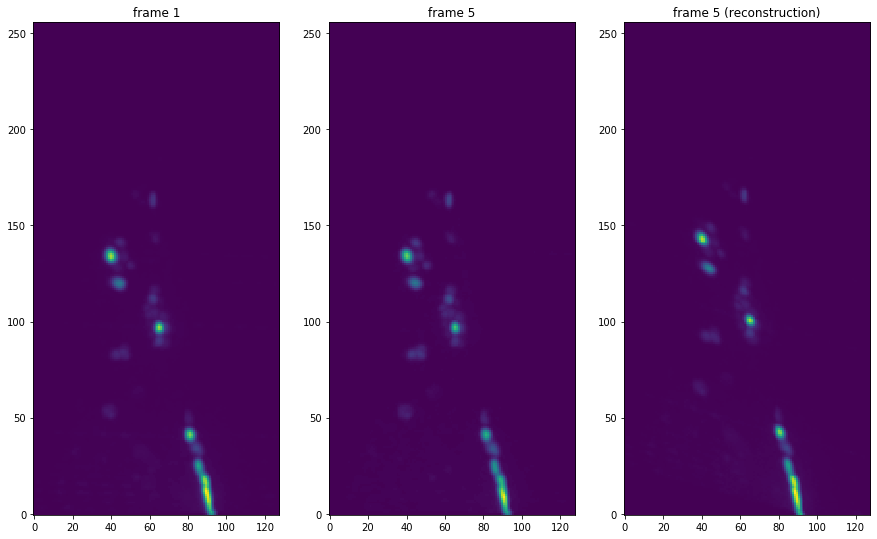

In [4]:
# Apply linear transform to first frame to reconstruct frame at time t
inv_beta = np.linalg.inv(beta)
inv_alpha = -inv_beta @ alpha
rec_img_t = affine_transform(frame_1, inv_beta, inv_alpha)

# MP reconstruction
#rec_pts_t = reg_data['rec_pts'][t, :, :].astype(int)
#rec_img_t = imagerep.reconstruct_image(rec_pts_t, [cov], wts_0, img_shape)

plt.figure(figsize=(15, 15))

plt.subplot(131)
plot_maxproj(frame_1)
plt.title('frame 1')
        
plt.subplot(132)
plot_maxproj(frame_t)
plt.title(f'frame {t}')
        
plt.subplot(133)
plot_maxproj(rec_img_t)
plt.title(f'frame {t} (reconstruction)');

In [5]:
dets = [np.linalg.det(reg_data['f_beta'][t, :, :]) for t in range(49)]
dets = np.array(dets)
print(dets)

[1.         1.         0.8618959  0.80688562 0.78343813 0.77235582
 0.68777407 0.69119113 0.77419027 0.68295253 0.65967564 0.62070686
 0.61669439 0.58182124 0.52028004 0.58283808 0.54627233 0.5007365
 0.41802977 0.35067908 0.361105   0.30273547 0.3060674  0.27972054
 0.34362959 0.35968203 0.32977948 0.35365126 0.28593199 0.29728792
 0.30744363 0.33265614 0.3323887  0.34564472 0.34389574 0.30560403
 0.28501837 0.31052056 0.3142353  0.31824407 0.31572394 0.34478507
 0.34645799 0.30037085 0.33160792 0.30323921 0.32382315 0.25610111
 0.27635219]


In [6]:
#t = 6
#rec_pts_t = reg_data['rec_pts'][t, :, :].astype(int)
#rec_img_t = imagerep.reconstruct_image(rec_pts_t, [cov], wts_0, img_shape)
#plot_maxproj(rec_img_t)

In [ ]:
#img_shape = frame_1.shape
#mp_img_1 = imagerep.reconstruct_image(pts_1, [cov], wts_1, img_shape)
#mp_img_2 = imagerep.reconstruct_image(pts_2, [cov], wts_2, img_shape)

In [ ]:
#plt.figure(figsize=(10, 10))

#plt.subplot(221)
#plot_maxproj(frame_1)
#plt.title('frame 1')
        
#plt.subplot(222)
#plot_maxproj(frame_2)
#plt.title('frame 2')

#plt.subplot(223)
#plot_maxproj(mp_img_1)
#plt.title('MP reconstruction')

#plt.subplot(224)
#plot_maxproj(mp_img_2)
#plt.title('MP reconstruction');